## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


## Loading the Dataset

In [2]:
df = sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [7]:
#convert the target variable(affairs) to 0 and 1
# 0 - Women who don't have any affairs
#1- Women with several affairs
df['affairs'] = (df.affairs>0).astype(int)#converting into binary features
df['affairs'].unique()


array([1, 0])

In [10]:
# separating the independent and dependent variable
X = df.drop(columns='affairs', axis=1)
y=df['affairs']

In [12]:
X.shape

(6366, 8)

In [13]:
y.shape

(6366,)

In [14]:
#check for empty values
df.isna().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [15]:
#check whether the dataset is balanced or not
print(df[df['affairs']==0].shape)
print(df[df['affairs']==1].shape)

(4313, 9)
(2053, 9)


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


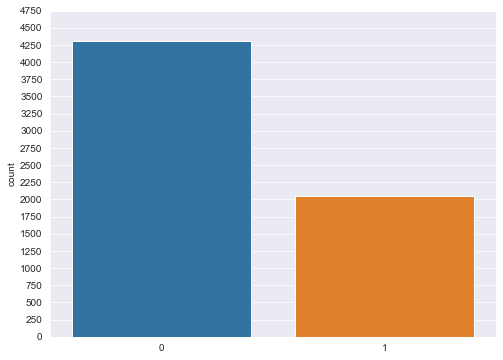

In [30]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(np.ravel(y))
plt.yticks(range(0,5000,250))
plt.show()

In [36]:
!pip install --upgrade imbalanced-learn


In [39]:
#'imblearn.over_sampling, provides various methods for randomly sampling from an imbalanced dataset to create a balanced dataset
from imblearn.over_sampling  import RandomOverSampler
rdm=RandomOverSampler()
X,y=rdm.fit_resample(X,y)
df=pd.concat([X,y],axis=1)  #updating the balanced form of dataset
print(df[df["affairs"]==0].shape)
print(df[df["affairs"]==1].shape)

(4313, 9)
(4313, 9)


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


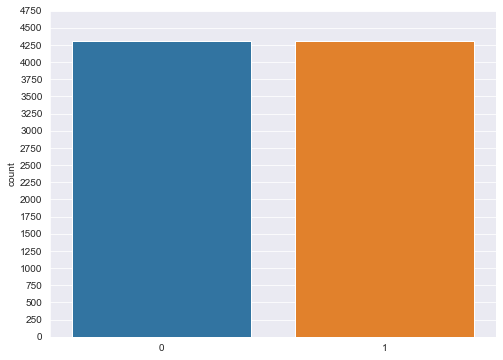

In [40]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(np.ravel(y))
plt.yticks(range(0,5000,250))
plt.show()

In [41]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000
mean,3.991073,29.409460,9.502203,1.475539,2.380594,14.150591,3.435891,3.859610,0.500000
std,1.005510,6.799649,7.286931,1.430753,0.873806,2.154964,0.950182,1.336879,0.500029
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,3.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.500000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


## Data Visualization

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


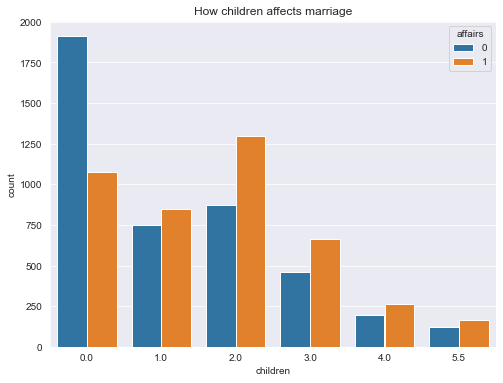

In [42]:
#check how children affects the relationship between husband-wife
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("children",data=df,hue="affairs")
plt.title("How children affects marriage")
plt.show()

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


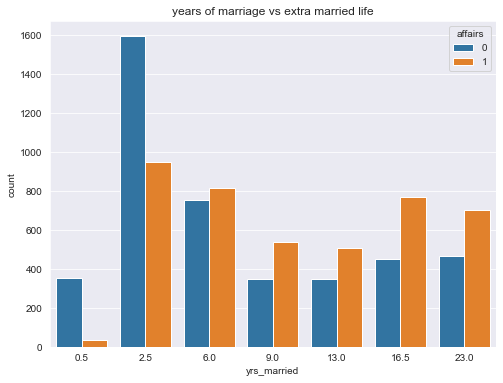

In [43]:
# years of marriage vs extra married life
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("yrs_married",data=df,hue="affairs")
plt.title("years of marriage vs extra married life")
plt.show()

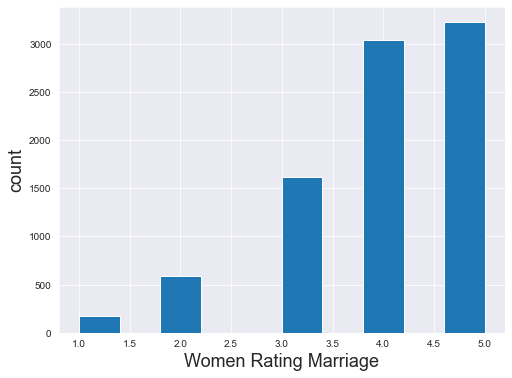

In [45]:
#Women rating their married life
plt.figure(figsize=(8,6))
plt.hist(df['rate_marriage'])
plt.xlabel("Women Rating Marriage",fontsize=18)
plt.ylabel("count",fontsize=18)
plt.show()


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


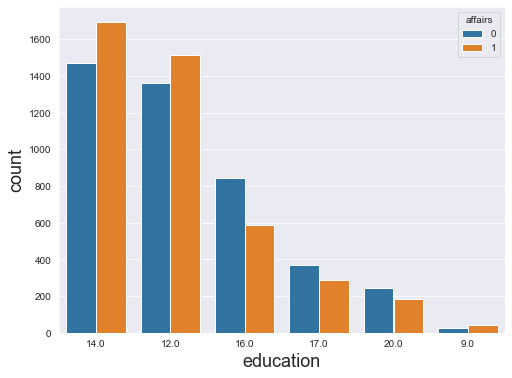

In [48]:
#Education imapacts marraige
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("educ",hue="affairs",data=df,order=df["educ"].value_counts().index)
plt.xlabel("education",fontsize=18)
plt.ylabel("count",fontsize=18)
plt.show()

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


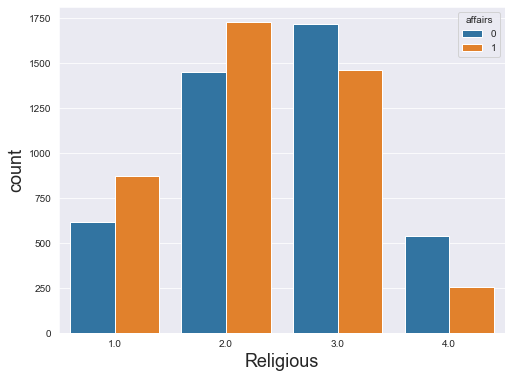

In [50]:
#Religious vs Marriage
plt.figure(figsize=(8,6))
sns.countplot('religious', hue='affairs', data=df)
plt.xlabel("Religious",fontsize=18)
plt.ylabel("count",fontsize=18)
plt.show()


# Data Modelling

In [52]:
#splitting the data into training and testing 
# assume X is your feature matrix and y is your target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6900, 8)
(6900,)
(1726, 8)
(1726,)


## Training the model and making prediction


In [57]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_test_predict =log_reg.predict(X_test)
y_train_predict = log_reg.predict(X_train)

## Model Evaluation

In [58]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve
print("Training Set Accuracy: ",accuracy_score(y_train,y_train_predict))
print("Testing Set Accuracy: ",accuracy_score(y_test,y_test_predict))

Training Set Accuracy:  0.6814492753623188
Testing Set Accuracy:  0.6732329084588644


## Confusion Matrix

In [59]:
cm =confusion_matrix(y_test,y_test_predict)
print(cm)

[[593 236]
 [328 569]]


<AxesSubplot:>

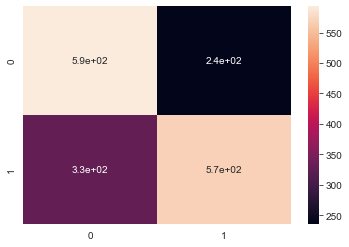

In [60]:
sns.heatmap(cm,annot=True)

Text(0.5, 1.0, 'Confusion Matrix')

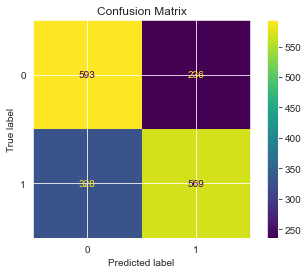

In [71]:
disp = metrics.plot_confusion_matrix(log_reg, X_test, y_test)
disp.ax_.set_title('Confusion Matrix')

## Finding Precision,Recall F1- Score



In [73]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.64      0.72      0.68       829
           1       0.71      0.63      0.67       897

    accuracy                           0.67      1726
   macro avg       0.68      0.67      0.67      1726
weighted avg       0.68      0.67      0.67      1726



## ROC Curve

Text(0.5, 1.0, 'ROC Curve')

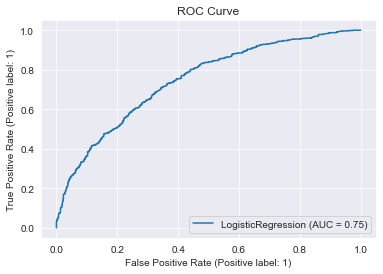

In [78]:
#pred_prob = predict_proba(X_test)
roc_result = metrics.plot_roc_curve(log_reg, X_test, y_test)
roc_result.ax_.set_title('ROC Curve')


## Prediction System

In [87]:
print("Prediction chance of your model :")
print(log_reg.predict_proba(np.array([[3,27,13,3,1,14,3,4]]))*100)


Prediction chance of your model :
[[15.65751725 84.34248275]]


C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [90]:
print("your prediction is  :",log_reg.predict(np.array([[3,27,13,3,1,14,3,4]])))

your prediction is  : [1]


C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [32]:
import pickle
#save the model as pickle file
pickle.dump(log_reg,open('model.pkl','wb'))